In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [83]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [85]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

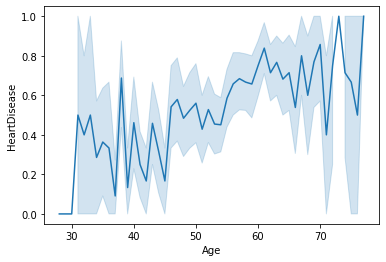

In [86]:
sns.lineplot(x='Age', y='HeartDisease', data = df, ci=95)

<AxesSubplot:xlabel='Age', ylabel='HeartDisease'>

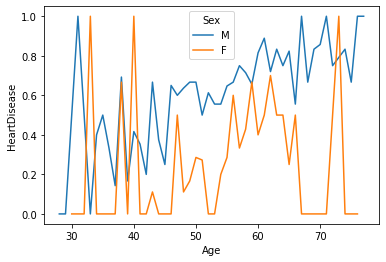

In [87]:
sns.lineplot(x='Age', y='HeartDisease', hue='Sex', data = df, ci=None)

<AxesSubplot:xlabel='ChestPainType', ylabel='Age'>

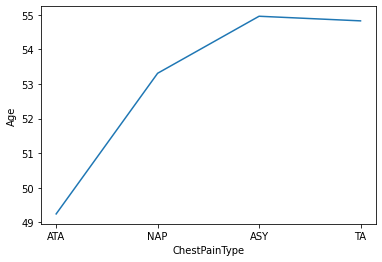

In [88]:
sns.lineplot(x='ChestPainType', y='Age', data = df, ci=None)

<AxesSubplot:xlabel='RestingECG', ylabel='Age'>

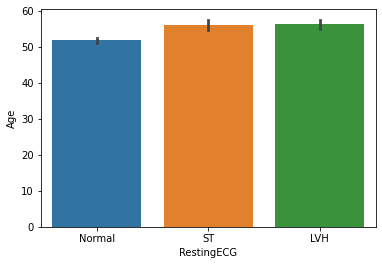

In [89]:
sns.barplot(x='RestingECG', y='Age', data=df, hue=None)

In [91]:
def find_boundary(data, variables):
    Q1 = data[variables].quantile(.25)
    Q3 = data[variables].quantile(.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    
    return lower_boundary, upper_boundary

In [92]:
lower_fixed, upper_fixed = find_boundary(df, 'RestingBP')
print("upper_fixed for RestingBP is: ", upper_fixed)
print("lower_fixed for RestingBP is: ", lower_fixed)

upper_fixed for RestingBP is:  170.0
lower_fixed for RestingBP is:  90.0


In [93]:
df['RestingBP'] = np.where(df['RestingBP']>upper_fixed, 130.000000, 
                                np.where(df['RestingBP']<lower_fixed, 130.000000, df['RestingBP']))

In [94]:
lower_fixed, upper_fixed = find_boundary(df, 'MaxHR')
print("upper_fixed for MaxHR is: ", upper_fixed)
print("lower_fixed for MaxHR is: ", lower_fixed)

upper_fixed for MaxHR is:  210.0
lower_fixed for MaxHR is:  66.0


In [95]:
df['MaxHR'] = np.where(df['MaxHR']>upper_fixed, 138.000000, 
                                np.where(df['MaxHR']<lower_fixed, 138.000000, df['MaxHR']))

In [96]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,131.079521,198.799564,0.233115,136.976035,0.887364,0.553377
std,9.432617,15.597206,109.384145,0.423046,25.215656,1.066570,0.497414
min,28.000000,92.000000,0.000000,0.000000,67.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,170.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<AxesSubplot:>

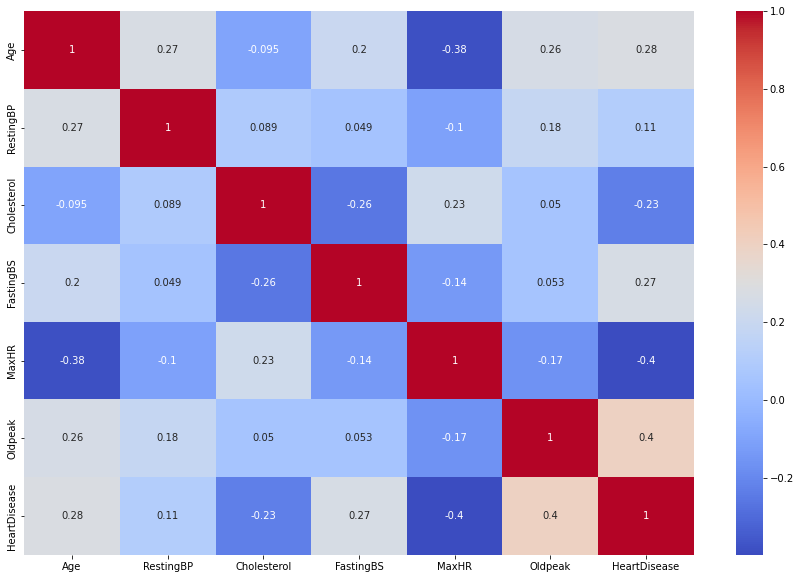

In [97]:
plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")

In [105]:
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
df[['Sex_En','ChestPainType_En','RestingECG_En', 'ExerciseAngina_En', 'ST_Slope_En']] = encode.fit_transform(df[['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope']])

In [126]:
df_n = df.drop(columns = ['Sex','ChestPainType','RestingECG', 'ExerciseAngina', 'ST_Slope'])

In [127]:
X = df_n.drop(columns = ['HeartDisease'])
y = df_n['HeartDisease']

In [128]:
X

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_En,ChestPainType_En,RestingECG_En,ExerciseAngina_En,ST_Slope_En
0,40,140.0,289,0,172.0,0.0,1.0,1.0,1.0,0.0,2.0
1,49,160.0,180,0,156.0,1.0,0.0,2.0,1.0,0.0,1.0
2,37,130.0,283,0,98.0,0.0,1.0,1.0,2.0,0.0,2.0
3,48,138.0,214,0,108.0,1.5,0.0,0.0,1.0,1.0,1.0
4,54,150.0,195,0,122.0,0.0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
913,45,110.0,264,0,132.0,1.2,1.0,3.0,1.0,0.0,1.0
914,68,144.0,193,1,141.0,3.4,1.0,0.0,1.0,0.0,1.0
915,57,130.0,131,0,115.0,1.2,1.0,0.0,1.0,1.0,1.0
916,57,130.0,236,0,174.0,0.0,0.0,1.0,0.0,0.0,1.0


In [129]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [130]:
y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [118]:
from imblearn.over_sampling import SMOTE

In [131]:
sampl = SMOTE()
X, y = sampl.fit_resample(X, y)

In [133]:
y.value_counts()

0    508
1    508
Name: HeartDisease, dtype: int64

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [135]:
from sklearn.preprocessing import MinMaxScaler

In [136]:
scale = MinMaxScaler()
X_train_Min = pd.DataFrame(scale.fit_transform(X_train))

In [137]:
X_train_scale, X_test_scale, y_train_scale, y_test_scale = train_test_split(X_train_Min, y_train, test_size = 0.25, random_state=42)

In [138]:
from sklearn.decomposition import PCA

In [139]:
pca = PCA(n_components= 11)
model = pca.fit(X_train_scale)
PCA(n_components= 11)
print(model.explained_variance_ratio_)

[0.33130184 0.15716292 0.14380046 0.09493981 0.0817737  0.06394138
 0.04413651 0.03399445 0.02290234 0.01834075 0.00770584]


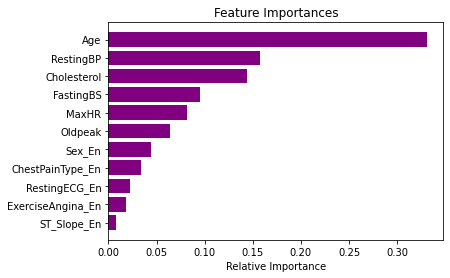

In [140]:
features = X.columns
importances = model.explained_variance_ratio_
indices = np.argsort(importances)[-11:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [141]:
from sklearn.linear_model import LogisticRegression

In [142]:
model = LogisticRegression()
log_result = model.fit(X_train_scale, y_train_scale)

In [143]:
coef_deter = log_result.score(X_train_scale, y_train_scale)
coef_deter

0.8669950738916257

In [144]:
y_predict = log_result.predict(X_test_scale)

In [145]:
from sklearn.metrics import confusion_matrix

In [147]:
confusion_matrix(y_test_scale, y_predict)

array([[84, 17],
       [21, 81]])

In [148]:
from sklearn.metrics import classification_report

In [149]:
print(classification_report(y_test_scale, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       101
           1       0.83      0.79      0.81       102

    accuracy                           0.81       203
   macro avg       0.81      0.81      0.81       203
weighted avg       0.81      0.81      0.81       203



In [150]:
from sklearn.metrics import accuracy_score

In [151]:
print("ac_score: ", accuracy_score(y_test_scale, y_predict))

ac_score:  0.812807881773399


In [152]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=4, random_state=1)

In [154]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(log_result, X_test_scale, y_test_scale, scoring="accuracy", cv=cv, n_jobs=1, error_score="raise")
np.mean(score)

0.8099404761904762